# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

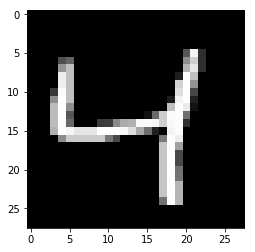

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]
print(str(image_size))

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

784


## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6951
Epoch: 1/20... Training loss: 0.6913
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6847
Epoch: 1/20... Training loss: 0.6799
Epoch: 1/20... Training loss: 0.6752
Epoch: 1/20... Training loss: 0.6687
Epoch: 1/20... Training loss: 0.6616
Epoch: 1/20... Training loss: 0.6527
Epoch: 1/20... Training loss: 0.6448
Epoch: 1/20... Training loss: 0.6312
Epoch: 1/20... Training loss: 0.6206
Epoch: 1/20... Training loss: 0.6054
Epoch: 1/20... Training loss: 0.5945
Epoch: 1/20... Training loss: 0.5723
Epoch: 1/20... Training loss: 0.5567
Epoch: 1/20... Training loss: 0.5396
Epoch: 1/20... Training loss: 0.5226
Epoch: 1/20... Training loss: 0.5034
Epoch: 1/20... Training loss: 0.4921
Epoch: 1/20... Training loss: 0.4719
Epoch: 1/20... Training loss: 0.4493
Epoch: 1/20... Training loss: 0.4420
Epoch: 1/20... Training loss: 0.4192
Epoch: 1/20... Training loss: 0.4051
Epoch: 1/20... Training loss: 0.3914
Epoch: 1/20... Training loss: 0.3743
E

Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1758
Epoch: 1/20... Training loss: 0.1735
Epoch: 1/20... Training loss: 0.1826
Epoch: 1/20... Training loss: 0.1812
Epoch: 1/20... Training loss: 0.1742
Epoch: 1/20... Training loss: 0.1812
Epoch: 1/20... Training loss: 0.1810
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1820
Epoch: 2/20... Training loss: 0.1772
Epoch: 2/20... Training loss: 0.1769
Epoch: 2/20... Training loss: 0.1850
Epoch: 2/20... Training loss: 0.1848
Epoch: 2/20... Training loss: 0.1779
Epoch: 2/20... Training loss: 0.1809
Epoch: 2/20... Training loss: 0.1823
Epoch: 2/20... Training loss: 0.1766
Epoch: 2/20... Training loss: 0.1776
Epoch: 2/20... Training loss: 0.1791
Epoch: 2/20... Training loss: 0.1850
Epoch: 2/20... Training loss: 0.1845
E

Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1468
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1461
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1461
E

Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1277
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1262
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1275
E

Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1199
E

Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1183
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1093
E

Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1135
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1117
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1061
E

Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1031
E

Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1000
E

Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1042
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0976
E

Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.1026
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0995
E

Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0898
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0881
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0985
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0984
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

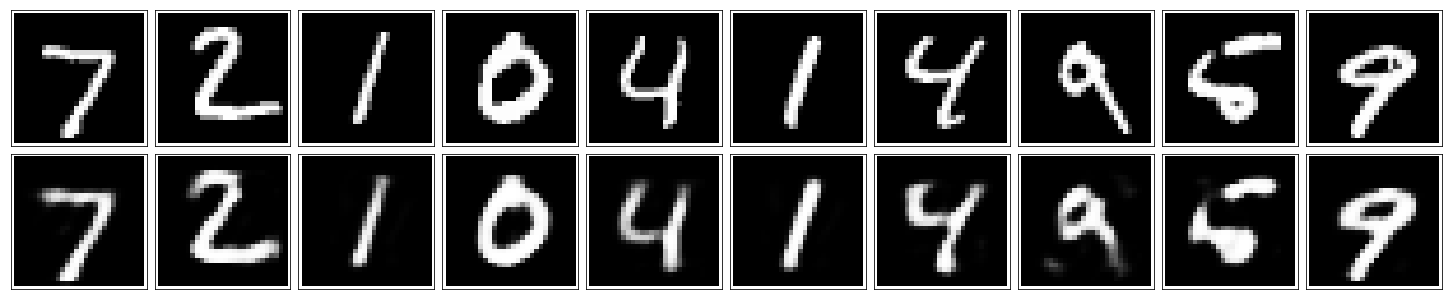

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.